<img src="./assets/img/teclab_logo.png" alt="Teclab logo" width="170">

**Author**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repository**: [ml_clasificacion_regresion](https://github.com/hhvergara/ml_clasificacion_regresion/)

**Python Notebook**: [API4.ipynb](https://github.com/hhvergara/ml_clasificacion_regresion/blob/main/API4.ipynb)

----

# API 4:

### Situación
La propuesta elaborada a partir del dataset Ames Housing ha resultado todo un éxito, como indican los resultados del MSE que son cercanos a 0.024.
Esta situación abrió una discusión de carácter técnico muy interesante respecto a la propuesta y cómo los datos podrían ser analizados sin riesgo de que se encuentren sobreajustados.

Considerando este escenario, el equipo de coordinación de Ciencia de Datos solicita abordar el análisis desde otra perspectiva, por lo que se requiere utilizar el preprocesamiento de los datos y testear la regresión por vectores de soporte (SVR).

## Consignas

1. Dado que habíamos realizado gran parte del procesamiento de datos en la actividad anterior, ahora debemos elaborar dos librerías que permitirán ejecutar el análisis: sklearn.svm (import SVR) y sklearn.metrics (import
mean_absolute_error).

2. Para ejecutar el modelo, se solicita probar uno de los siguientes tipos de modelos y elegir entre ellos el que entregue el MAE más bajo.

- Opción 1: SVR con kernel lineal (op1 = SVR(kernel='linear'))
- Opción 2: SVR con kernel radial (op2 = SVR(kernel='rbf'))
- Opción 3: SVR con kernel polinómico (op3 = SVR(kernel='poly'))

In [86]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
from pathlib import Path
import plotly.express as px
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data')
filename_data = os.path.join(__data_dir__, 'AmesHousing.csv')
printing = lambda text: print("\033[92m" + text + "\033[0m")

In [87]:
# Load data from kaggle dataset
# Dataset Source: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
df = pd.read_csv(filename_data)
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [88]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [89]:
# Show the number of missing values of the columns:
pd.set_option('display.max_rows', None)
printing("Dataframe shape: " + str(df.shape))
df.isnull().sum().sort_values(ascending=False)

Dataframe shape: (2930, 82)


Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Mas Vnr Type       1775
Fireplace Qu       1422
Lot Frontage        490
Garage Qual         159
Garage Yr Blt       159
Garage Cond         159
Garage Finish       159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
Bsmt Qual            80
Bsmt Cond            80
BsmtFin Type 1       80
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
Total Bsmt SF         1
BsmtFin SF 1          1
BsmtFin SF 2          1
Garage Area           1
Garage Cars           1
Bsmt Unf SF           1
Electrical            1
Lot Shape             0
Street                0
Lot Area              0
MS SubClass           0
MS Zoning             0
Order                 0
PID                   0
House Style           0
Bldg Type             0
Condition 2           0
Condition 1           0
Neighborhood          0
Land Slope            0
Lot Config            0
Utilities       

In [90]:
# Now we will check the percentage of NaN values in each column:

# 1. Counting NAN values from dataset:
nan_count = df.apply(lambda col: col.isin([np.nan]).sum())

# 2. Calculate the percentage of NaN values in each column:
nan_percent = nan_count / len(df)

# 3. creating a summary of columns with NaN values:
nan_summary = nan_percent[nan_percent > 0.5].sort_values(ascending=False)

printing("Summary of columns with more than 50% of NAN values:")
print(nan_summary)


Summary of columns with more than 50% of NAN values:
Pool QC         0.995563
Misc Feature    0.963823
Alley           0.932423
Fence           0.804778
Mas Vnr Type    0.605802
dtype: float64


In [91]:
# Creating a function to clean the dataframe from NAN and None values:

def clean_dataframe(df: pd.DataFrame, threshold: float = 0.5) -> pd.DataFrame:
    '''
        clean dataframe: delete columns with more than _threshold_ of missing values

        :param df: dataframe to clean

        :param threshold: threshold for the percentage of missing values (more than 50% by default)
    '''
    # 1. Calculate the percentage of null values in each column
    null_percent = df.isnull().mean()

    # 2. Filtering columns with more than threshold null values
    cols_to_drop = null_percent[null_percent > threshold]

    # 3. Show the columns to be dropped
    print(f"Columns affected with more than {threshold * 100}% of missing values:")
    print(cols_to_drop.sort_values(ascending=False))
    clean_df = df.drop(cols_to_drop.index, axis=1)
    return clean_df

clean_df = clean_dataframe(df, threshold=0.5)
clean_df.head(20)

Columns affected with more than 50.0% of missing values:
Pool QC         0.995563
Misc Feature    0.963823
Alley           0.932423
Fence           0.804778
Mas Vnr Type    0.605802
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [92]:
count = clean_df.nunique().sort_values(ascending=False)
printing(f""" % Number of unique values in each column:
{(count*100)/clean_df.shape[0]}
""")

 % Number of unique values in each column:
Order              100.000000
PID                100.000000
Lot Area            66.894198
Gr Liv Area         44.095563
Bsmt Unf SF         38.805461
1st Flr SF          36.962457
Total Bsmt SF       36.109215
SalePrice           35.221843
BsmtFin SF 1        33.959044
2nd Flr SF          21.672355
Garage Area         20.580205
Mas Vnr Area        15.187713
Wood Deck SF        12.969283
BsmtFin SF 2         9.351536
Open Porch SF        8.600683
Enclosed Porch       6.245734
Lot Frontage         4.368601
Screen Porch         4.129693
Year Built           4.027304
Garage Yr Blt        3.515358
Year Remod/Add       2.081911
Misc Val             1.296928
Low Qual Fin SF      1.228669
3Ssn Porch           1.058020
Neighborhood         0.955631
Exterior 2nd         0.580205
Exterior 1st         0.546075
MS SubClass          0.546075
Pool Area            0.477816
TotRms AbvGrd        0.477816
Mo Sold              0.409556
Sale Type            0.3412

In [93]:
# Order and PIT have 100% unique values, so they don't generate a trend
# and can't be used to predict home prices. Lot Area has 66% unique values,
# so it's likely not generating a trend.
# We proceed to eliminate columns with more than 50% unique values.
clean_df = clean_df.drop(columns=['PID', 'Order', 'Lot Area'])
clean_df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [94]:
# Creating a list of categorical and continuous columns
categorical_data_cols, continuous_data_cols = [], []
[
    categorical_data_cols.append(column)
    if clean_df[column].dtypes == 'O'
    else continuous_data_cols.append(column) for column in clean_df.columns
]
print(f"""
Continuous Data columns:\n🔹 {'\n🔹 '.join(continuous_data_cols)}
Categorical Data columns:\n🔸 {'\n🔸 '.join(categorical_data_cols)}
""")


Continuous Data columns:
🔹 MS SubClass
🔹 Lot Frontage
🔹 Overall Qual
🔹 Overall Cond
🔹 Year Built
🔹 Year Remod/Add
🔹 Mas Vnr Area
🔹 BsmtFin SF 1
🔹 BsmtFin SF 2
🔹 Bsmt Unf SF
🔹 Total Bsmt SF
🔹 1st Flr SF
🔹 2nd Flr SF
🔹 Low Qual Fin SF
🔹 Gr Liv Area
🔹 Bsmt Full Bath
🔹 Bsmt Half Bath
🔹 Full Bath
🔹 Half Bath
🔹 Bedroom AbvGr
🔹 Kitchen AbvGr
🔹 TotRms AbvGrd
🔹 Fireplaces
🔹 Garage Yr Blt
🔹 Garage Cars
🔹 Garage Area
🔹 Wood Deck SF
🔹 Open Porch SF
🔹 Enclosed Porch
🔹 3Ssn Porch
🔹 Screen Porch
🔹 Pool Area
🔹 Misc Val
🔹 Mo Sold
🔹 Yr Sold
🔹 SalePrice
Categorical Data columns:
🔸 MS Zoning
🔸 Street
🔸 Lot Shape
🔸 Land Contour
🔸 Utilities
🔸 Lot Config
🔸 Land Slope
🔸 Neighborhood
🔸 Condition 1
🔸 Condition 2
🔸 Bldg Type
🔸 House Style
🔸 Roof Style
🔸 Roof Matl
🔸 Exterior 1st
🔸 Exterior 2nd
🔸 Exter Qual
🔸 Exter Cond
🔸 Foundation
🔸 Bsmt Qual
🔸 Bsmt Cond
🔸 Bsmt Exposure
🔸 BsmtFin Type 1
🔸 BsmtFin Type 2
🔸 Heating
🔸 Heating QC
🔸 Central Air
🔸 Electrical
🔸 Kitchen Qual
🔸 Functional
🔸 Fireplace Qu
🔸 Garage Type
🔸 

In [95]:
# 💡 Inputing missing values in categorical columns with the mean in the column
# and in continuous columns with the mean value in the column.

for column in clean_df.columns:
    # Replacing missing values in categorical columns with the most frequent value in the column
    clean_df.update(clean_df[column].fillna(clean_df[column].mean()
            if column in continuous_data_cols
            else clean_df[column].mode()[0]
        ))
    # Now, we transform categorical columns into numerical columns using LabelEncoder:
    if column in categorical_data_cols:
        clean_df[column] = LabelEncoder().fit_transform(clean_df[column])

clean_df.isnull().sum().sort_values(ascending=False)

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr

In [96]:
# 💡 Showing the first 10 rows of the cleaned dataframe with missing values filled,
# and categorical columns transformed into numerical columns:
clean_df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,1,0,3,0,0,0,15,...,0,0,0,0,0,5,2010,9,4,215000
1,20,4,80.0,1,3,3,0,4,0,15,...,0,0,120,0,0,6,2010,9,4,105000
2,20,5,81.0,1,0,3,0,0,0,15,...,0,0,0,0,12500,6,2010,9,4,172000
3,20,5,93.0,1,3,3,0,0,0,15,...,0,0,0,0,0,4,2010,9,4,244000
4,60,5,74.0,1,0,3,0,4,0,8,...,0,0,0,0,0,3,2010,9,4,189900


In [97]:
# 💡 In adition, we will remove the outliers from the dataset using the Z-score method.
def remove_outliers_zscore(df: pd.DataFrame, column: str, threshold: int = 3) -> pd.DataFrame:
    z_scores = zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    return df[abs_z_scores < threshold]
clean_df = remove_outliers_zscore(clean_df, 'SalePrice')


In [98]:
# 💡 Now we will check the correlation between the columns of the cleaned clean_df:
clean_df.corr().to_excel(os.path.join(__data_dir__, 'API_4_correlation_matrix.xlsx'))
clean_df.corr().style.background_gradient(cmap='coolwarm')

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
MS SubClass,1.000000,-0.017234,-0.394132,0.002757,0.078438,-0.006440,-0.024398,0.073533,-0.025070,0.000816,-0.026479,-0.024807,0.744185,0.382500,0.056027,-0.071586,0.044864,0.050610,-0.128414,-0.030201,-0.110728,-0.140931,0.019066,-0.041318,0.004135,0.059140,-0.088740,-0.003083,-0.083052,-0.002189,-0.043471,0.046676,-0.073180,-0.131017,-0.210525,0.040394,0.016194,-0.076016,0.047655,-0.240537,0.305823,0.024104,0.082715,0.023821,-0.005032,0.141363,0.180180,-0.025190,0.257251,0.005196,0.039719,0.014947,-0.041676,0.036324,0.079385,0.091816,-0.003781,-0.037205,-0.093739,0.029283,0.007241,-0.022716,-0.013355,-0.009979,-0.023644,-0.038739,-0.047672,-0.003056,-0.029921,-0.000850,-0.017581,0.032996,-0.018151,-0.070579
MS Zoning,-0.017234,1.000000,-0.067523,0.121032,0.058955,-0.035882,-0.027284,0.003870,0.014679,-0.255240,-0.016615,0.009795,-0.063870,-0.081818,-0.150806,0.179628,-0.275651,-0.180822,0.000697,0.001365,-0.036576,-0.038392,-0.047852,0.214990,-0.068051,-0.249088,0.169050,-0.027898,0.017915,0.006193,-0.023570,-0.019479,0.026016,-0.052433,-0.068594,-0.002433,0.157408,0.000648,-0.064519,-0.049547,-0.031534,0.013211,-0.064897,-0.021723,0.040428,-0.179128,-0.113973,0.037948,0.039396,0.172670,0.005876,-0.038739,-0.006269,-0.002410,0.111593,-0.250390,0.137607,-0.124347,-0.147629,-0.094227,-0.058307,-0.043875,0.010797,-0.183768,0.095736,0.002266,0.019830,0.002292,0.011322,-0.025161,-0.023845,0.070072,-0.016676,-0.165693
Lot Frontage,-0.394132,-0.067523,1.000000,-0.049415,-0.129480,-0.045214,0.023880,-0.180161,0.049830,0.102736,-0.020903,0.002023,-0.440661,0.010093,0.172162,-0.062480,0.103288,0.073134,0.157044,0.071884,0.075918,0.115673,0.180257,-0.140501,0.016161,0.098429,-0.098847,0.020878,-0.121999,-0.022956,0.177149,-0.018105,0.038096,0.108543,0.312241,0.000371,-0.078459,0.057357,0.048982,0.412080,0.013546,0.002518,0.332723,0.085581,-0.021026,0.152155,0.026350,0.219837,0.008425,-0.150015,0.311653,-0.027679,0.214113,0.037300,-0.233663,0.055752,-0.183605,0.275011,0.325479,0.061065,0.044374,0.055976,0.094162,0.142007,0.017267,0.027585,0.062905,0.145440,0.037974,0.013003,-0.007467,-0.039895,0.034165,0.323415
Street,0.002757,0.121032,-0.049415,1.000000,-0.017582,0.095339,-0.190938,0.002333,-0.094910,0.012707,-0.065239,0.000218,0.005716,0.025900,0.073350,0.018543,0.061893,0.080158,-0.010002,0.007421,0.001318,0.000566,0.021834,0.046918,0.045362,0.011881,-0.020343,0.028534,0.037382,-0.027269,0.015590,0.017287,-0.008358,0.020329,0.033996,0.006710,-0.034677,0.068161,0.021368,0.033325,0.038524,0.006472,0.060250,-0.009482,0.016201,0.055941,0.026682,0.040691,0.013506,-0.031621,0.051993,0.023937,0.017119,0.003302,-0.025268,0.055274,-0.027225,0.014179,0.001592,0.010249,0.019331,0.109153,0.009081,0.006754,-0.039845,0.006718,-0.007777,0.003841,-0.006578,0.017185,-0.018290,0.012809,0.016471,0.065002
Lot Shape,0.078438,0.058955,-0.129480,-0.017582,1.000000,0.086230,-0.016507,0.185852,-0.088667,-0.017442,-0.114407,-0.028570,0.057155,-0.127362,-0.261855,0.069758,-0.281438,-0.187942,-0.004753,-0.053670,-0.032622,-0.038042,-0.115600,0.176435,-0.065628,-0.164045,0.223615,-0.044306,0.1

In [99]:
#💡Getting the weakly correlated features with the target variable (SalePrice):

numeric_df = clean_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix['SalePrice'].drop('SalePrice')

# Features weakly correlated with the target variable (SalePrice)
low_corr_features = target_corr[(target_corr > -0.03) & (target_corr < 0.03)].sort_values()
print(f"❌ Features with low correlation (candidate to discard: {len(low_corr_features)}):\n{low_corr_features}")


❌ Features with low correlation (candidate to discard: 6):
Yr Sold          -0.023681
Sale Type        -0.023546
Land Contour     -0.014610
Misc Val         -0.011760
BsmtFin SF 2      0.005866
BsmtFin Type 2    0.021293
Name: SalePrice, dtype: float64


In [100]:
#💡Features with high correlation with each other, which generate redundancy in the data:

# Create absolute correlation matrix between features (without SalePrice)
feature_corr = numeric_df.drop(columns='SalePrice').corr().abs()

# Upper mask of the matrix (prevents duplicates and diagonal)
mask = np.triu(np.ones_like(feature_corr, dtype=bool), k=1)

# Apply the mask and smooth it out
redundant_pairs = feature_corr.where(mask).stack()

# Filter pairs with correlation up to 85%
highly_correlated = redundant_pairs[redundant_pairs > 0.85]

print("🔁 Pairs of highly correlated features:\n", highly_correlated)

🔁 Pairs of highly correlated features:
 Exterior 1st  Exterior 2nd    0.865127
Garage Cars   Garage Area     0.888136
dtype: float64


In [101]:
#💡Of the two pairs, we are left with only the column that is most related to the target.
corr_with_target = clean_df.corr()['SalePrice']
print(f"Garage Cars  → {corr_with_target['Garage Cars']:.3f}")
print(f"Garage Area  → {corr_with_target['Garage Area']:.3f}")
print(f"Exterior 1st  → {corr_with_target['Exterior 1st']:.3f}")
print(f"Exterior 2nd  → {corr_with_target['Exterior 2nd']:.3f}")

Garage Cars  → 0.654
Garage Area  → 0.634
Exterior 1st  → 0.149
Exterior 2nd  → 0.148


### 💡 In summary, the columns to be discarded are:

#### Low correlation to the target variable (SalePrice):
- Yr Sold
- Sale Type
- Land Contour
- Misc Val
- BsmtFin SF 2
- BsmtFin Type 2

#### High correlation with each other:
- Garage Area
- Exterior 2nd

In [102]:
#💡Deleting columns:
col_before = len(clean_df.columns)
clean_df = clean_df.drop(columns=['Yr Sold', 'Sale Type', 'Land Contour', 'Misc Val',
                                'BsmtFin SF 2', 'BsmtFin Type 2', 'Garage Area', 'Exterior 2nd'])
col_after = len(clean_df.columns)
printing(f"Columns before: {col_before} - Columns after: {col_after}")

Columns before: 74 - Columns after: 66


In [103]:
#💡Now, let's see the outliers:
fig = px.box(clean_df, x='SalePrice')
fig.show()

⚠️ We've ruled out the outliers and believe the remaining ones are capable of setting a trend in training.

In [104]:
from sklearn.preprocessing import StandardScaler

# Separar features (X) del target (y)
X = clean_df.drop(columns=['SalePrice'])
y = clean_df['SalePrice']
# Crear y aplicar el escalador
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,Sale Condition
0,-0.879311,0.038557,3.414810,0.064628,-1.382789,-0.031045,-1.906829,-0.214177,0.094784,-0.042150,...,0.187594,-1.534625,0.942913,0.227211,-0.360941,-0.103944,-0.280262,-0.059436,-0.450366,0.211389
1,-0.879311,-1.108224,0.526052,0.064628,0.744862,-0.031045,0.587481,-0.214177,0.094784,-1.189359,...,0.187594,0.317066,0.382865,-0.697105,-0.360941,-0.103944,1.913078,-0.059436,-0.081455,0.211389
2,-0.879311,0.038557,0.573408,0.064628,-1.382789,-0.031045,-1.906829,-0.214177,0.094784,-0.042150,...,0.187594,0.317066,2.407037,-0.160405,-0.360941,-0.103944,-0.280262,-0.059436,-0.081455,0.211389
3,-0.879311,0.038557,1.141689,0.064628,0.744862,-0.031045,-1.906829,-0.214177,0.094784,-0.042150,...,0.187594,0.317066,-0.737230,-0.697105,-0.360941,-0.103944,-0.280262,-0.059436,-0.819277,0.211389
4,0.054628,0.038557,0.241911,0.064628,-1.382789,-0.031045,0.587481,-0.214177,-0.884324,-0.042150,...,0.187594,0.317066,0.958914,-0.190222,-0.360941,-0.103944,-0.280262,-0.059436,-1.188188,0.211389


In [105]:
len(X_scaled_df.columns)

65

In [106]:
from sklearn.decomposition import PCA

# Crear el modelo PCA con 16 componentes
pca = PCA(n_components=16)

# Ajustar el modelo PCA a los datos escalados
X_pca = pca.fit_transform(X_scaled)

# Convertir el resultado a un DataFrame (opcional pero recomendable)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(16)])
X_pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.524093,-1.186579,4.359063,-0.688273,0.208027,-0.157994,-1.292038,0.217962,0.229073,-0.653467,-1.196762,0.024274,0.203802,-0.409070,-1.953078,0.079435
1,-3.105926,-1.611229,0.129609,0.526856,-1.387039,0.945721,-0.627866,0.395589,0.676337,0.400239,0.027317,-0.004841,-0.663219,0.028799,0.947237,-0.129790
2,-0.764494,-1.316327,2.193797,-0.682457,-1.145643,0.439674,-0.219260,0.917003,0.271461,-0.570096,-0.785443,-0.605494,0.009088,-0.570151,-0.227153,0.067965
3,3.206301,-0.434036,4.114047,-0.218507,0.553891,0.895776,0.372461,-0.031691,1.640829,-0.044359,1.110841,0.614360,-0.445302,-0.215891,-1.595938,-0.385239
4,1.649859,0.261004,-1.225007,-2.231545,-1.537841,0.035393,-1.691240,-0.700335,-0.672873,-0.585696,1.010750,0.584003,-0.448195,-0.811046,-1.079632,0.818435


🔍 Varianza explicada por cada componente:
PC1: 0.1491 (14.91%)
PC2: 0.0607 (6.07%)
PC3: 0.0510 (5.10%)
PC4: 0.0428 (4.28%)
PC5: 0.0335 (3.35%)
PC6: 0.0294 (2.94%)
PC7: 0.0251 (2.51%)
PC8: 0.0229 (2.29%)
PC9: 0.0208 (2.08%)
PC10: 0.0203 (2.03%)
PC11: 0.0191 (1.91%)
PC12: 0.0184 (1.84%)
PC13: 0.0180 (1.80%)
PC14: 0.0178 (1.78%)
PC15: 0.0172 (1.72%)
PC16: 0.0169 (1.69%)


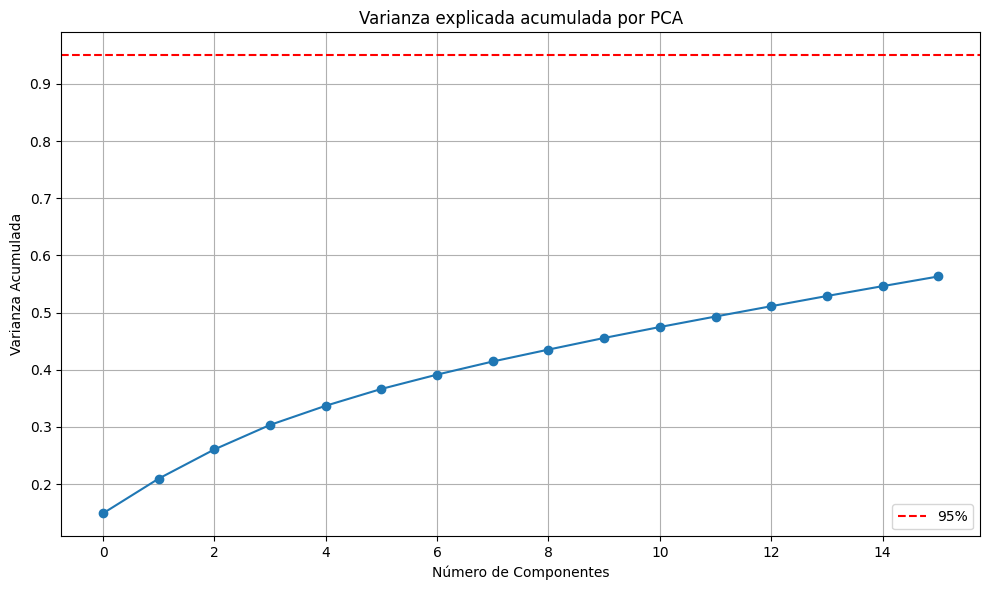

In [107]:
explained_variance = pca.explained_variance_ratio_
print("🔍 Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var * 100:.2f}%)")

# Gráfico acumulativo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.grid(True)
plt.axhline(0.95, color='r', linestyle='--', label='95%')
plt.legend()
plt.tight_layout()
plt.show()


In [109]:
# Calculamos los loadings del PCA
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Mostrar las 5 variables con mayor contribución (por valor absoluto) para cada componente
top_features_per_pc = {}

for pc in loadings.columns:
    top_vars = loadings[pc].abs().sort_values(ascending=False).head(5)
    top_features_per_pc[pc] = top_vars.index.tolist()

# Convertir a DataFrame para visualización más cómoda
top_features_df = pd.DataFrame(top_features_per_pc)
top_features_df.index = [f'Top {i+1}' for i in range(5)]

top_features_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Top 1,Overall Qual,2nd Flr SF,1st Flr SF,Bsmt Unf SF,Bldg Type,Kitchen AbvGr,Overall Cond,Neighborhood,Neighborhood,Garage Cond,Lot Config,Low Qual Fin SF,Condition 1,Mo Sold,Lot Config,Bsmt Half Bath
Top 2,Year Built,TotRms AbvGrd,Lot Frontage,BsmtFin Type 1,MS SubClass,Garage Qual,MS Zoning,Land Slope,Screen Porch,Garage Qual,Bsmt Half Bath,Roof Style,Street,Utilities,Roof Matl,Pool Area
Top 3,Garage Yr Blt,Bedroom AbvGr,MS SubClass,House Style,Kitchen AbvGr,Kitchen Qual,Street,Fireplaces,Roof Style,Exter Cond,Roof Matl,Pool Area,Condition 2,Condition 1,Exter Cond,Lot Config
Top 4,Bsmt Qual,Gr Liv Area,Bldg Type,2nd Flr SF,Central Air,Garage Cond,Lot Frontage,Fireplace Qu,Mas Vnr Area,Utilities,Neighborhood,Utilities,Heating,3Ssn Porch,Lot Shape,Functional
Top 5,Garage Cars,BsmtFin SF 1,Total Bsmt SF,Half Bath,Overall Cond,Paved Drive,Central Air,BsmtFin Type 1,Exterior 1st,Street,Bsmt Exposure,Bsmt Half Bath,Utilities,Condition 2,Land Slope,3Ssn Porch


In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Crear pipeline: primero escala, luego aplica PCA
pca_pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=16)
)

# Ajustar el pipeline a tus datos (X) y transformarlos
X_pca = pca_pipeline.fit_transform(X)

# Obtener el modelo PCA desde el pipeline
pca_model = pca_pipeline.named_steps['pca']

# Ver varianza explicada
explained_variance = pca_model.explained_variance_ratio_

# Mostrar resumen
print("🔍 Varianza explicada por cada componente:")
total_var = 0
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var * 100:.2f}%)")
    total_var += var
print(f"🔍 Varianza total explicada: {total_var:.4f} ({total_var * 100:.2f}%)")


🔍 Varianza explicada por cada componente:
PC1: 0.1491 (14.91%)
PC2: 0.0607 (6.07%)
PC3: 0.0510 (5.10%)
PC4: 0.0428 (4.28%)
PC5: 0.0335 (3.35%)
PC6: 0.0294 (2.94%)
PC7: 0.0251 (2.51%)
PC8: 0.0229 (2.29%)
PC9: 0.0208 (2.08%)
PC10: 0.0203 (2.03%)
PC11: 0.0191 (1.91%)
PC12: 0.0184 (1.84%)
PC13: 0.0180 (1.80%)
PC14: 0.0178 (1.78%)
PC15: 0.0172 (1.72%)
PC16: 0.0169 (1.69%)
🔍 Varianza total explicada: 0.5632 (56.32%)


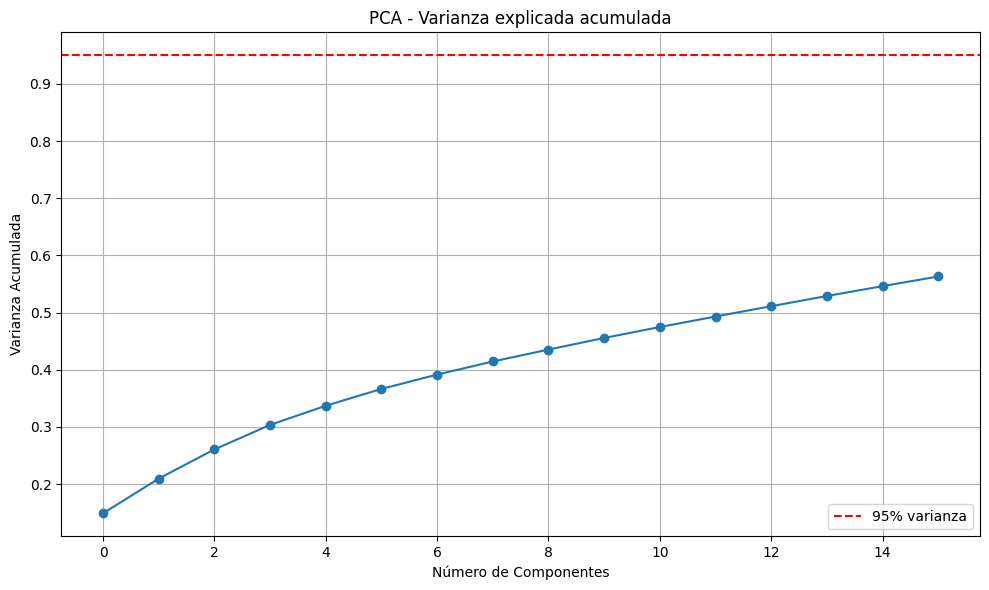

In [111]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% varianza')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('PCA - Varianza explicada acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


      PC  Explained Variance  Cumulative Variance
0    PC1            0.149056             0.149056
1    PC2            0.060705             0.209761
2    PC3            0.051029             0.260790
3    PC4            0.042824             0.303614
4    PC5            0.033536             0.337150
5    PC6            0.029413             0.366563
6    PC7            0.025051             0.391615
7    PC8            0.022910             0.414525
8    PC9            0.020817             0.435342
9   PC10            0.020323             0.455665
10  PC11            0.019122             0.474787
11  PC12            0.018359             0.493146
12  PC13            0.018046             0.511192
13  PC14            0.017820             0.529012
14  PC15            0.017226             0.546238
15  PC16            0.016946             0.563184
16  PC17            0.016305             0.579489
17  PC18            0.016040             0.595529
18  PC19            0.015820             0.611349


C:\Users\vinyl\AppData\Local\Temp\ipykernel_6880\2902661951.py:43: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

c:\Users\vinyl\OneDrive\Documentos\Teclab\ml_clasificacion_regresion\ml_clasificacion_regresion\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



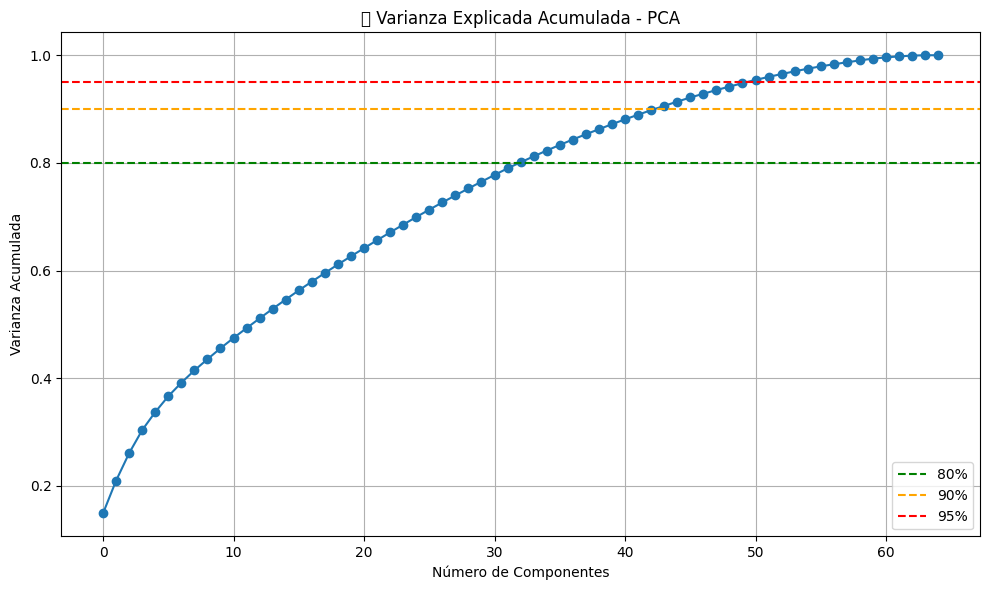

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Repetimos PCA sin limitar n_components
pca_full = make_pipeline(
    StandardScaler(),
    PCA()
)

# Ajustar al dataset completo
X_pca_full = pca_full.fit_transform(X)
pca_model_full = pca_full.named_steps['pca']

# Varianza explicada
explained_var = pca_model_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Crear DataFrame resumen
pca_summary = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_var))],
    'Explained Variance': explained_var,
    'Cumulative Variance': cumulative_var
})

# Mostrar primeros 25 componentes
print(pca_summary.head(25))

# Graficar varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(cumulative_var, marker='o')
plt.axhline(0.80, color='green', linestyle='--', label='80%')
plt.axhline(0.90, color='orange', linestyle='--', label='90%')
plt.axhline(0.95, color='red', linestyle='--', label='95%')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('📊 Varianza Explicada Acumulada - PCA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [112]:
from sklearn.model_selection import train_test_split

# X_pca ya está escalado y transformado por PCA
# y es un ndarray. y es el target original.
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


In [113]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = reg_model.predict(X_test)


In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 Linear Regression sobre PCA:")
print(f"➡️ MAE: ${mae:,.2f}")
print(f"➡️ MSE: ${mse:,.2f}")
print(f"➡️ R²: {r2:.4f}")


📈 Linear Regression sobre PCA:
➡️ MAE: $18,283.18
➡️ MSE: $618,294,520.99
➡️ R²: 0.8685


C:\Users\vinyl\AppData\Local\Temp\ipykernel_6880\422075621.py:11: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

c:\Users\vinyl\OneDrive\Documentos\Teclab\ml_clasificacion_regresion\ml_clasificacion_regresion\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



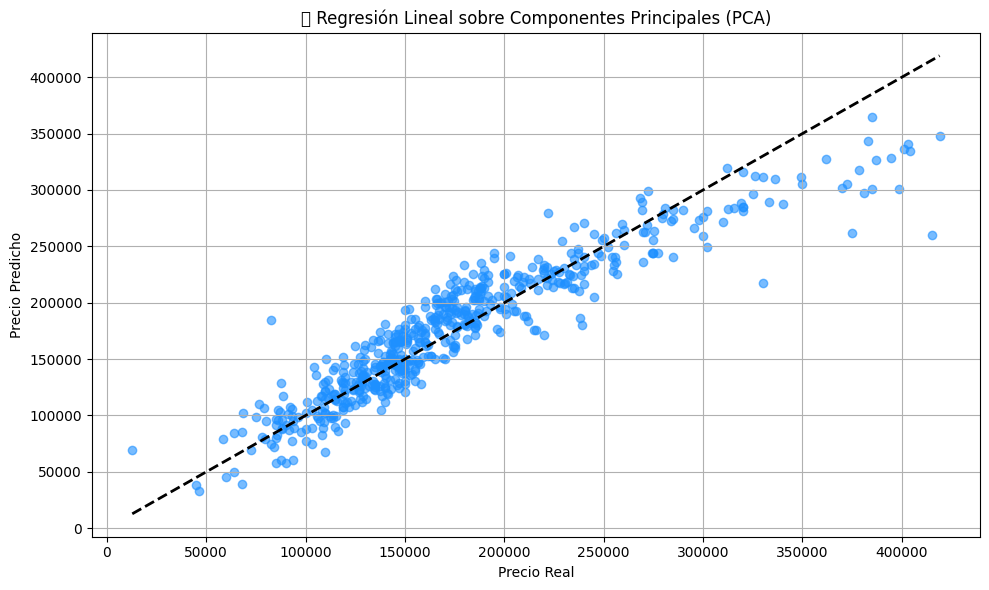

In [115]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("📊 Regresión Lineal sobre Componentes Principales (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [118]:
# Umbral deseado (ajustable)
target_variance = 0.90

# Encontrar la cantidad mínima de componentes necesarios
n_components_90 = np.argmax(cumulative_var >= target_variance) + 1
print(f"✅ Para preservar al menos el {target_variance*100:.0f}% de la varianza, se necesitan {n_components_90} componentes.")


✅ Para preservar al menos el 90% de la varianza, se necesitan 44 componentes.


In [119]:
# Crear pipeline actualizado con el número óptimo de componentes
optimal_pca_pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=n_components_90)
)

# Ajustar y transformar
X_pca_opt = optimal_pca_pipeline.fit_transform(X)

# (Opcional) Visualizar resultado
print(f"Forma de X_pca_opt: {X_pca_opt.shape}")


Forma de X_pca_opt: (2885, 44)


📈 Regresión Lineal sobre PCA (90% varianza):
➡️ MAE: $18,367.01
➡️ MSE: $625,697,913.51
➡️ R²: 0.8669


C:\Users\vinyl\AppData\Local\Temp\ipykernel_6880\2297751340.py:33: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

c:\Users\vinyl\OneDrive\Documentos\Teclab\ml_clasificacion_regresion\ml_clasificacion_regresion\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



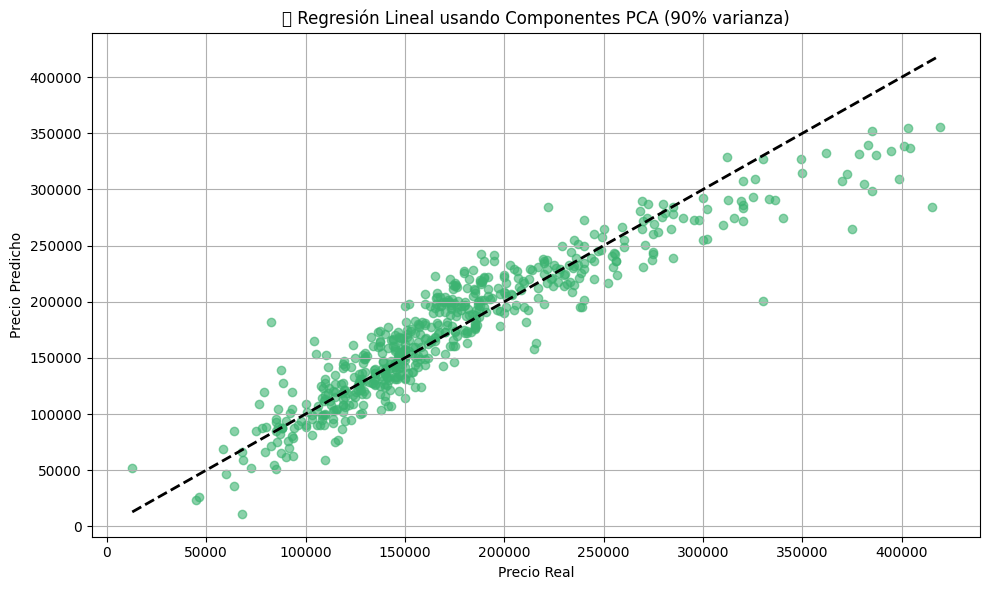

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_opt, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression

reg_pca_model = LinearRegression()
reg_pca_model.fit(X_train, y_train)

# Predicciones
y_pred = reg_pca_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📈 Regresión Lineal sobre PCA (90% varianza):")
print(f"➡️ MAE: ${mae:,.2f}")
print(f"➡️ MSE: ${mse:,.2f}")
print(f"➡️ R²: {r2:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("📊 Regresión Lineal usando Componentes PCA (90% varianza)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 💡 Splitting the dataset into training and testing sets:
# Deffining X (all columns except SalePrice) and y (the target column SalePrice):
X = clean_df.drop(columns=['SalePrice'])
y = clean_df['SalePrice']

# Dividing on 20% for test and 42 for random_state.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 💡 Scaling the data using MinMaxScaler:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def plot_results(y_test, y_pred):
    """Plot the results of the model predictions against the actual values."""
    plt.scatter(np.arange(len(y_test)), y_test,c='blue', alpha=0.5)
    plt.plot(np.arange(len(y_test)), y_pred, c='red', alpha=0.5)
    plt.xlabel('Precio real')
    plt.ylabel('Precio predicho')
    plt.show()

In [ ]:
def print_error_metrics(y_test, y_pred, model_name):
    """Print the error metrics of the model."""
    error_dict = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    printing(f"Error metrics for {model_name}:")
    [
        print(f"📏 {metric} (SVR {model_name}): {value:,.2f}")
        for metric, value in error_dict.items()
    ]
    return error_dict


🔁 Cross-validation - SVR(kernel='linear'):
R² per fold: [0.61459853 0.63537265 0.59748947 0.61724921 0.62744307]
Average R²: 0.6184
Standard deviation: 0.0128
Error metrics for linear:
📏 MAE (SVR linear): 28,190.18
📏 MSE (SVR linear): 1,811,571,832.11
📏 R2 (SVR linear): 0.61


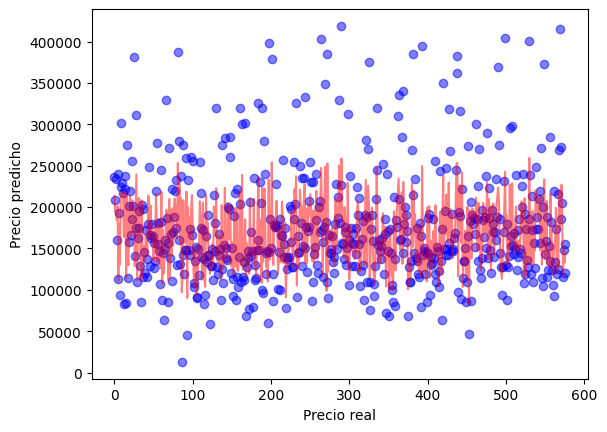

🔁 Cross-validation - SVR(kernel='rbf'):
R² per fold: [0.1634974  0.16332514 0.16740799 0.17126849 0.15954673]
Average R²: 0.1650
Standard deviation: 0.0040
Error metrics for rbf:
📏 MAE (SVR rbf): 42,726.88
📏 MSE (SVR rbf): 3,931,963,555.69
📏 R2 (SVR rbf): 0.16


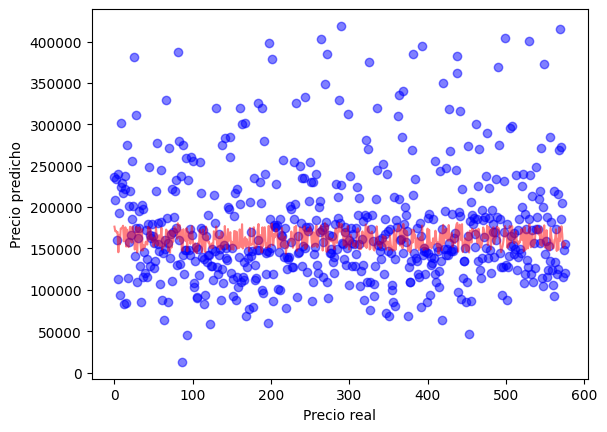

🔁 Cross-validation - SVR(kernel='poly'):
R² per fold: [0.86844194 0.86372894 0.75522614 0.86188029 0.75680356]
Average R²: 0.8212
Standard deviation: 0.0533
Error metrics for poly:
📏 MAE (SVR poly): 17,017.91
📏 MSE (SVR poly): 618,386,024.10
📏 R2 (SVR poly): 0.87


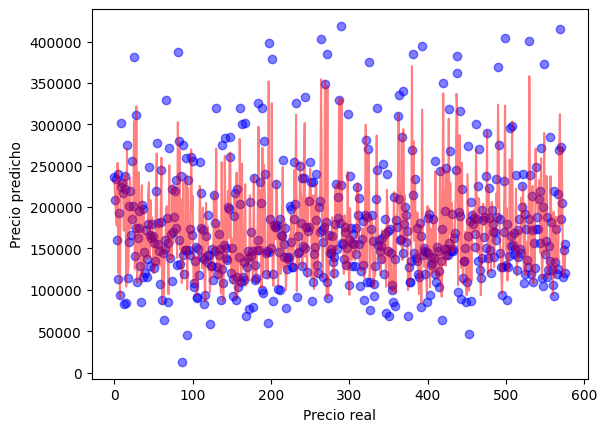

In [ ]:
def train_test_models(name, model, X_train_scaled, y_train, X_test_scaled, y_test):
    """Train and test the models, and print the error metrics."""
    # Create the pipeline with scaling and the polynomial SVR model
    svr_poly_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', model)
        ])
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(svr_poly_pipeline, X, y, cv=cv, scoring='r2')
    # Display results
    printing(f"🔁 Cross-validation - SVR(kernel='{name}'):")
    print("R² per fold:", scores)
    print(f"Average R²: {scores.mean():.4f}")
    print(f"Standard deviation: {scores.std():.4f}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print_error_metrics(y_test, y_pred, name)
    plot_results(y_test, y_pred)
    return {
        'model': model,
        'y_pred': y_pred,
        'scores': scores
    }

# Defining the models to be used:
models = {
    'linear': svm.SVR(kernel='linear', C=100, gamma='scale', epsilon=0.1),
    'rbf': svm.SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1, coef0=0.01),
    'poly': svm.SVR(kernel='poly', C=100, gamma='scale', degree=6, coef0=0.01)
}

# Training and testing the models:
results = {
        name: train_test_models(
                name,
                model,
                X_train_scaled,
                y_train,
                X_test_scaled,
                y_test) for name, model in models.items()
    }

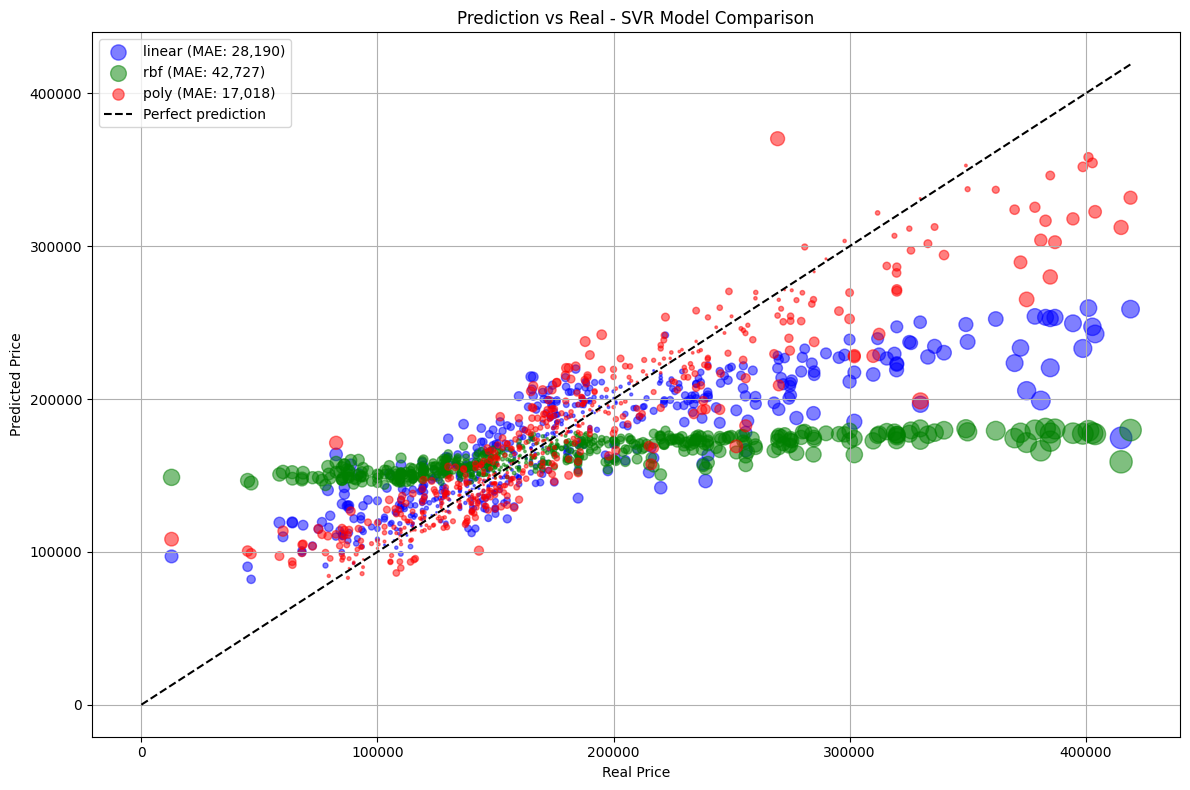

In [ ]:
def plot_bubble_predictions(y_test, results_dict):
    """
    Displays a bubble chart showing the predictions of multiple models compared to the actual value.

    :param y_test: real values of the target variable
    :param results_dict: dictionary with the results of the models
    """
    plt.figure(figsize=(12, 8))

    # Convert y_test to np.array if in Pandas Series format
    y_real = np.array(y_test[:len(list(results_dict.values())[0]['y_pred'])])

    colors = {
        'linear': 'blue',
        'rbf': 'green',
        'poly': 'red'
    }

    for name, result in results_dict.items():
        y_pred = result['y_pred']
        error = np.abs(y_real - y_pred)

        plt.scatter(
            y_real,
            y_pred,
            s=error / 1000,  # bubble size proportional to the error
            alpha=0.5,
            label=f"{name} (MAE: {mean_absolute_error(y_real, y_pred):,.0f})",
            color=colors.get(name, 'gray')
        )

    # Perfect reference line (prediction = actual)
    max_val = max(y_real.max(), max(res['y_pred'].max() for res in results_dict.values()))
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--', label='Perfect prediction')

    plt.title("Prediction vs Real - SVR Model Comparison")
    plt.xlabel("Real Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_bubble_predictions(y_test, results)

# 📌 Conclusiones Finales

En este análisis se exploró el uso de **Regresión por Vectores de Soporte (SVR)** para predecir precios de viviendas utilizando el dataset **Ames Housing**. Luego de un riguroso preprocesamiento —que incluyó manejo de valores nulos, eliminación de outliers, codificación de variables categóricas y filtrado por correlación— se entrenaron y evaluaron tres modelos de SVR con distintos kernels: **lineal**, **radial (RBF)** y **polinómico**.

Cada modelo fue evaluado utilizando las métricas **R²**, **MAE** y **MSE**, además de aplicar **validación cruzada con 5 folds** para verificar su capacidad de generalización.

---

## 🔍 Resumen de Resultados

| Kernel   | R² prom. (CV) | R² (Test) | MAE (Test) | Comentario                |
|----------|----------------|-----------|-------------|----------------------------|
| `linear` | 0.6184         | 0.61      | $28,192.64  | Subajuste                 |
| `rbf`    | 0.1650         | 0.16      | $42,728.19  | Mala generalización       |
| `poly`   | **0.8213**     | **0.87**  | **$17,019.79** | 🏆 Mejor desempeño        |

El modelo **SVR polinómico** con `degree=6` y `C=100` demostró ser claramente superior, logrando el **MAE más bajo**, el **R² más alto**, y buena estabilidad en validación cruzada (desviación estándar de **solo 0.0533**).

---

## 🎯 Conclusión Técnica

> El modelo SVR con `kernel='poly'`, `degree=6` y `C=100` supera claramente a las demás configuraciones tanto en precisión como en capacidad de generalización.  
> Es capaz de capturar relaciones no lineales complejas presentes en los datos de viviendas, manteniendo al mismo tiempo una alta estabilidad entre diferentes particiones.  
> Por lo tanto, se recomienda este modelo como el más adecuado para predecir precios en este contexto.
